![](../assets/Banner-Image.jpg)

# Table of Contents
1. [Import Dependencies](#1-import-dependencies)
2. [Adjust Data](#2-adjust-data)
3. [Analysis](#3-analysis)
   - [3a. Determine Important Features](#3a-determine-important-features)
   - [3b. PCA Analysis](#3b-pca-analysis)
   - [3c. Clustering Analysis](#3c-clustering-analysis)
   - [3d. Euclidean Distance Analysis](#3d-euclidean-distance-analysis)

# 1. Import Dependencies

In [130]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text
from matplotlib.image import imread


# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE

# Statistical Analysis
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist, cdist

# Display settings
import warnings
warnings.filterwarnings('ignore')

# 2. Adjust Data

In [81]:
# These stats are either duplicates or not useful for our analysis
STATS_TO_DROP = ['gk_clean_sheets_pct', 'gk_goals_against', 'gk_save_pct',
    'players_used', 'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
    'goals_assists', 'goals_pens', 'pens_made', 'pens_att','xg', 'npxg','xg_assist', 'npxg_xg_assist', 'gk_games', 
    'gk_games_starts', 'gk_minutes','gk_saves', 'gk_wins', 'games',
    'gk_ties', 'gk_losses','gk_clean_sheets', 'gk_pens_att', 'gk_pens_allowed', 
    'gk_pens_saved', 'gk_pens_missed', 'shots', 'shots_on_target',
    'avg_age', 'goals_per90', 'assists_per90', 'goals_assists_per90',
    'goals_pens_per90', 'goals_assists_pens_per90', 'xg_per90', 'xg_assist_per90', 'xg_xg_assist_per90',
    'npxg_per90', 'npxg_xg_assist_per90', 'gk_goals_against_per90', 'gk_shots_on_target_against', 
    'gk_clean_sheets_pct', 'gk_pens_save_pct', 'gk_own_goals_against', 'gk_psxg', 
    'gk_psnpxg_per_shot_on_target_against', 'gk_psxg_net', 'gk_psxg_net_per90', 'gk_passes_completed_launched',
    'gk_passes_launched', 'gk_passes', 'gk_passes_throws', 'gk_goal_kicks', 'gk_crosses_stopped', 
    'gk_def_actions_outside_pen_area', 'shots_per90', 'shots_on_target_per90', 'gk_free_kick_goals_against',
    'goals_per_shot', 'goals_per_shot_on_target', 'average_shot_distance', 'shots_free_kicks',
    'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_short', 'passes_medium', 'passes_long', 'pass_xa',
    'xg_assist_net', 'assisted_shots', 'passes_live', 'passes_dead', 'passes_free_kicks', 'crosses', 'throw_ins',
    'corner_kicks', 'corner_kicks_straight', 'sca_per90', 'gca_per90', 
    'tackles_interceptions', 'challenge_tackles', 'challenges_lost', 'touches_live_ball', 
    'take_ons_tackled', 'cards_yellow_red', 'pens_won',	'pens_conceded', 'own_goals', 'aerials_lost'


]

# These stats are too representative of the amount of games played, leading to skewed results.
# Thus we convert them to per 90 stats.
STATS_TO_PER90 = [
    'progressive_carries', 'progressive_passes', 'gk_free_kick_goals_against', 
    'passes_completed', 'cards_red', 'cards_yellow',
    'passes_total_distance', 'passes_progressive_distance', 'passes', 'passes_completed_short',
    'passes_completed_medium', 'passes_completed_long',
    'pass_xa', 'passes_into_final_third', 'gk_crosses',
    'passes_into_penalty_area', 'crosses_into_penalty_area', 
    'through_balls', 'passes_switches',
    'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight',
    'sca_passes_live', 'sca_passes_dead',
    'sca_take_ons', 'sca_shots', 'sca_fouled', 'sca_defense', 'gca_passes_live',
    'gca_passes_dead', 'gca_take_ons', 'gca_shots', 'gca_fouled', 'gca_defense',
    'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd',
    'challenges', 'blocks', 'blocked_shots',
    'blocked_passes', 'interceptions', 'clearances', 'errors',
    'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
    'touches_att_pen_area', 'take_ons', 'take_ons_won',
    'carries', 'carries_distance', 'carries_progressive_distance',
    'carries_into_final_third', 'carries_into_penalty_area', 'miscontrols', 'dispossessed',
    'passes_received', 'progressive_passes_received', 'fouls', 'fouled',
    'offsides','ball_recoveries', 'aerials_won'

]

In [82]:
df = pd.read_csv("../data/top5Leagues.csv")

In [83]:
df['avg_carries_distance'] = df['carries_distance']/df['carries']
df['avg_progressive_carries_distance'] = df['carries_progressive_distance']/df['carries']
df['corner_kicks_conceded_pct'] = df['gk_corner_kick_goals_against']/df['gk_goals_against']
df['corner_kicks_in_pct']=df['corner_kicks_in']/(df['corner_kicks_in']+df['corner_kicks_out'])
df['sca_passes_live_pct']=df['sca_passes_live']/df['sca']
df['sca_passes_dead_pct']=df['sca_passes_dead']/df['sca']
df['sca_take_ons_pct']=df['sca_take_ons']/df['sca']
df['sca_fouled_pct']=df['sca_fouled']/df['sca']
df['sca_take_ons_pct']=df['sca_take_ons']/df['sca']
df['sca_shots_pct']=df['sca_shots']/df['sca']
df['sca_defense_pct']=df['sca_defense']/df['sca']
df['tackles_def_3rd_per90_pct']=df['tackles_def_3rd']/df['tackles']
df['tackles_mid_3rd_per90_pct']=df['tackles_mid_3rd']/df['tackles']
df['tackles_att_3rd_per90_pct']=df['tackles_att_3rd']/df['tackles']
df['blocked_passes_per90_pct'] = df['blocked_passes']/df['blocks']
df['passes_total_distance_per_pass'] = df['passes_total_distance']/df['passes_completed']
df['passes_progressive_distance_per_pass'] = df['passes_progressive_distance']/df['passes_completed']
df['points_per_match'] = (3*df['gk_wins']+df['gk_ties'])/df['gk_games']

In [84]:
df[STATS_TO_PER90] = df[STATS_TO_PER90].div(df['minutes_90s'], axis=0)
df.drop(columns=STATS_TO_DROP, inplace=True)

In [85]:
df.drop(columns=['progressive_passes', 'gk_corner_kick_goals_against', 'passes_progressive_distance',
                 'passes_total_distance', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'corner_kicks_in',
                 'corner_kicks_out', 'passes_offsides', 'passes_blocked', 'sca_passes_live', 'sca', 'sca_passes_dead',
                 'sca_take_ons', 'sca_shots', 'sca_defense', 'gca_passes_live', 'gca', 'gca_passes_dead',
                 'gca_take_ons', 'gca_shots', 'gca_defense', 'blocked_passes', 'gca_fouled', 'sca_fouled'], inplace=True)

In [86]:
df = df.rename(columns={col: col + '_per90' for col in STATS_TO_PER90})
df.to_csv('../data/top5LeaguesADJUSTED.csv', index=False)

# 3. Analysis

In [87]:
df_filtered = df.drop(columns=["league"], errors="ignore").iloc[:-98]

X = df_filtered.drop(columns=["team", "season", "points_per_match"], errors="ignore")
y = df_filtered["points_per_match"]

reg_model = LinearRegression()
reg_model.fit(X, y)

coefficients = np.abs(reg_model.coef_)
log_weights = np.log(coefficients + 1e-5)

teams_data = df_filtered.drop(columns=["team", "season", "points_per_match"], errors="ignore")
teams_data = teams_data.select_dtypes(include=[np.number])
teams_data = teams_data.loc[:, X.columns]
teams_data = teams_data.set_index(df_filtered["team"])

scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

weighted_teams_data = teams_scaled

np.random.seed(43)
pca = PCA(n_components=0.95, random_state=43)
teams_pca = pca.fit_transform(weighted_teams_data)

pca_df = pd.DataFrame(teams_pca, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca.shape[1])])
pca_df["season"] = df_filtered.set_index("team")["season"]


## 3a. Determine Important Features 

In [88]:
weights_df = pd.DataFrame({"Feature": X.columns, "Regression_Weight": coefficients})

weights_df = weights_df.sort_values(by="Regression_Weight", ascending=False, key=abs)

pd.set_option("display.max_rows", None) 

print(weights_df)

                                  Feature  Regression_Weight
71                        sca_defense_pct           2.517634
75               blocked_passes_per90_pct           1.907839
72              tackles_def_3rd_per90_pct           1.042597
70                          sca_shots_pct           0.990031
74              tackles_att_3rd_per90_pct           0.833414
67                    sca_passes_dead_pct           0.637344
63       avg_progressive_carries_distance           0.619309
66                    sca_passes_live_pct           0.611708
68                       sca_take_ons_pct           0.363171
2                         cards_red_per90           0.273915
36                           errors_per90           0.272500
64              corner_kicks_conceded_pct           0.242741
73              tackles_mid_3rd_per90_pct           0.209183
62                   avg_carries_distance           0.198613
33                    blocked_shots_per90           0.196554
69                      

## 3b. PCA Analysis

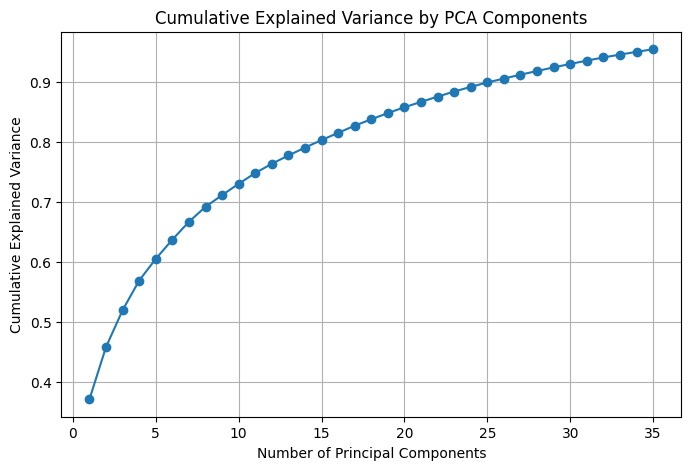

Cumulative Variance Explained by 35 components: 0.95


In [89]:
# Check cumulative variance explained by PCA components
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.show()


print(f"Cumulative Variance Explained by {pca.n_components_} components: {explained_variance_cumulative[-1]:.2f}")


## 3c. Clustering Analysis

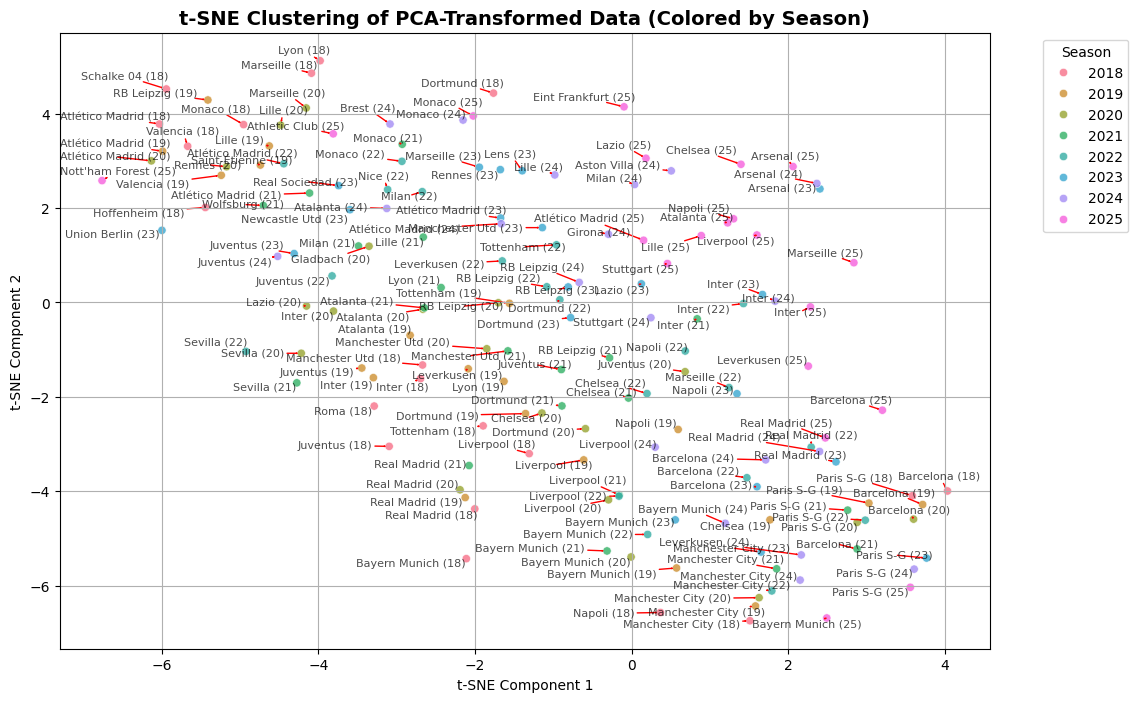

In [ ]:
df_top4 = (df.iloc[:-98].sort_values(by=["season", "league", "points_per_match"], ascending=[True, True, False])
            .groupby(["season", "league"])
            .head(4))

teams_data = df_top4.drop(columns=["team", "season", "points_per_match", "league"], errors="ignore")
teams_data = teams_data.select_dtypes(include=[np.number])
teams_data = teams_data.loc[:, X.columns]
teams_data = teams_data.set_index(df_top4["team"])

scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

np.random.seed(42)
pca = PCA(n_components=0.95, random_state=43)
teams_pca_top4 = pca.fit_transform(teams_scaled)

pca_df = pd.DataFrame(teams_pca_top4, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca_top4.shape[1])])
pca_df["season"] = df_top4.set_index("team")["season"]

pca_features = pca_df.filter(like="PC")

tsne = TSNE(n_components=2, perplexity=50, random_state=43, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(pca_features)

tsne_df_top4 = pd.DataFrame(X_tsne, index=pca_df.index, columns=["t-SNE Component 1", "t-SNE Component 2"])
tsne_df_top4["season"] = pca_df["season"].astype(str)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=tsne_df_top4["t-SNE Component 1"], 
    y=tsne_df_top4["t-SNE Component 2"], 
    hue=tsne_df_top4["season"], 
    palette=sns.color_palette("husl", n_colors=len(tsne_df_top4["season"].unique())),
    alpha=0.8
)

for team, season, (x, y) in zip(tsne_df_top4.index, tsne_df_top4["season"], zip(tsne_df_top4["t-SNE Component 1"], tsne_df_top4["t-SNE Component 2"])):
    season_label = str(season)[-2:]
    plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7)

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of PCA-Transformed Data (Colored by Season)", fontsize=14, fontweight='bold')
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("../plots/tsne.png", bbox_inches='tight', dpi=600)
plt.show()


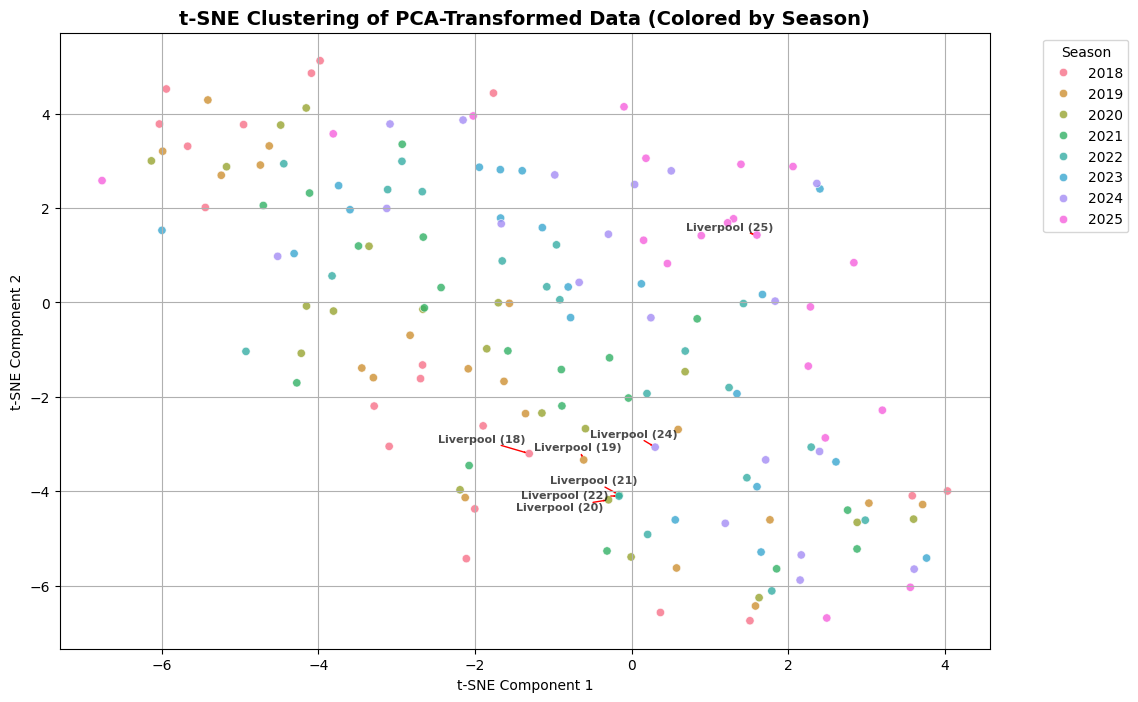

In [ ]:
df_top4 = (df.iloc[:-98].sort_values(by=["season", "league", "points_per_match"], ascending=[True, True, False])
            .groupby(["season", "league"])
            .head(4))

teams_data = df_top4.drop(columns=["team", "season", "points_per_match", "league"], errors="ignore")
teams_data = teams_data.select_dtypes(include=[np.number])
teams_data = teams_data.loc[:, X.columns]
teams_data = teams_data.set_index(df_top4["team"])

scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

np.random.seed(42)
pca = PCA(n_components=0.95, random_state=43)
teams_pca_top4 = pca.fit_transform(teams_scaled)

pca_df = pd.DataFrame(teams_pca_top4, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca_top4.shape[1])])
pca_df["season"] = df_top4.set_index("team")["season"]

pca_features = pca_df.filter(like="PC")

tsne = TSNE(n_components=2, perplexity=50, random_state=43, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(pca_features)

tsne_df_top4 = pd.DataFrame(X_tsne, index=pca_df.index, columns=["t-SNE Component 1", "t-SNE Component 2"])
tsne_df_top4["season"] = pca_df["season"].astype(str)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=tsne_df_top4["t-SNE Component 1"], 
    y=tsne_df_top4["t-SNE Component 2"], 
    hue=tsne_df_top4["season"], 
    palette=sns.color_palette("husl", n_colors=len(tsne_df_top4["season"].unique())),
    alpha=0.8
)
texts = []
for team, season, (x, y) in zip(tsne_df_top4.index, tsne_df_top4["season"], zip(tsne_df_top4["t-SNE Component 1"], tsne_df_top4["t-SNE Component 2"])):
    season_label = str(season)[-2:]
    if team == "Liverpool":
        texts.append(plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7, color='black', fontweight='bold'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of PCA-Transformed Data (Colored by Season)", fontsize=14, fontweight='bold')
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("../plots/liverpool_tsne.png", bbox_inches='tight', dpi=600)
plt.show()

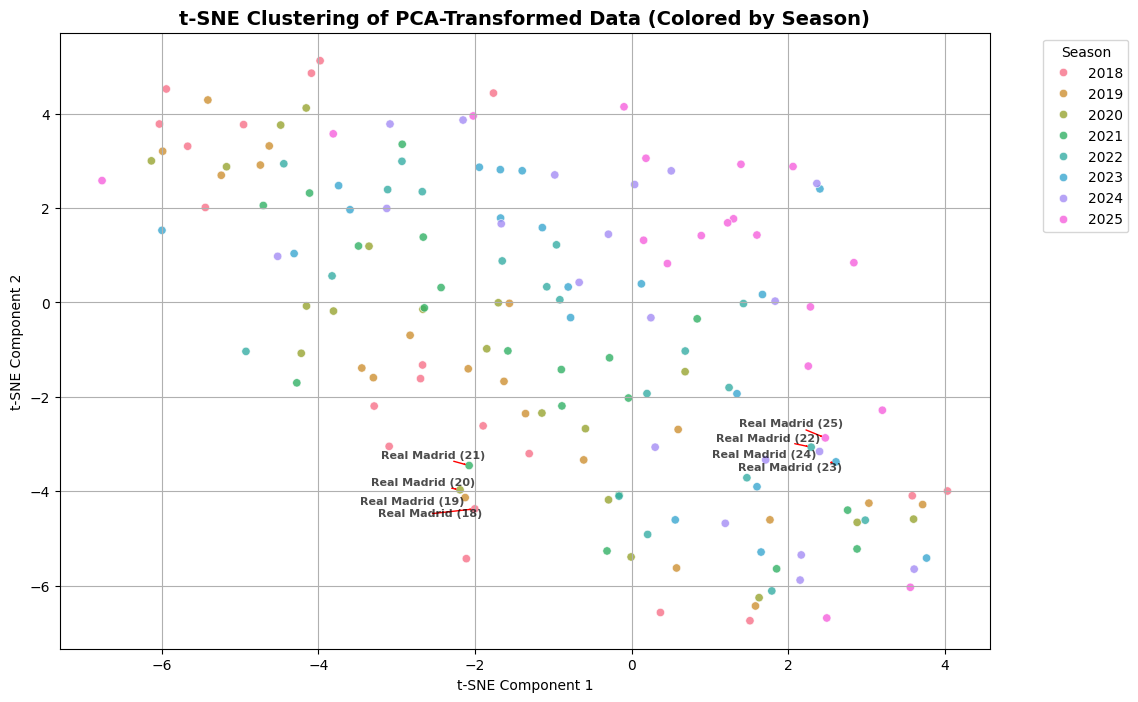

In [132]:
df_top4 = (df.iloc[:-98].sort_values(by=["season", "league", "points_per_match"], ascending=[True, True, False])
            .groupby(["season", "league"])
            .head(4))

teams_data = df_top4.drop(columns=["team", "season", "points_per_match", "league"], errors="ignore")
teams_data = teams_data.select_dtypes(include=[np.number])
teams_data = teams_data.loc[:, X.columns]
teams_data = teams_data.set_index(df_top4["team"])

scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

np.random.seed(42)
pca = PCA(n_components=0.95, random_state=43)
teams_pca_top4 = pca.fit_transform(teams_scaled)

pca_df = pd.DataFrame(teams_pca_top4, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca_top4.shape[1])])
pca_df["season"] = df_top4.set_index("team")["season"]

pca_features = pca_df.filter(like="PC")

tsne = TSNE(n_components=2, perplexity=50, random_state=43, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(pca_features)

tsne_df_top4 = pd.DataFrame(X_tsne, index=pca_df.index, columns=["t-SNE Component 1", "t-SNE Component 2"])
tsne_df_top4["season"] = pca_df["season"].astype(str)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=tsne_df_top4["t-SNE Component 1"], 
    y=tsne_df_top4["t-SNE Component 2"], 
    hue=tsne_df_top4["season"], 
    palette=sns.color_palette("husl", n_colors=len(tsne_df_top4["season"].unique())),
    alpha=0.8
)
texts = []
for team, season, (x, y) in zip(tsne_df_top4.index, tsne_df_top4["season"], zip(tsne_df_top4["t-SNE Component 1"], tsne_df_top4["t-SNE Component 2"])):
    season_label = str(season)[-2:]
    if team == "Real Madrid":
        texts.append(plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7, color='black', fontweight='bold'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of PCA-Transformed Data (Colored by Season)", fontsize=14, fontweight='bold')
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("../plots/madrid_tsne.png", bbox_inches='tight', dpi=600)
plt.show()

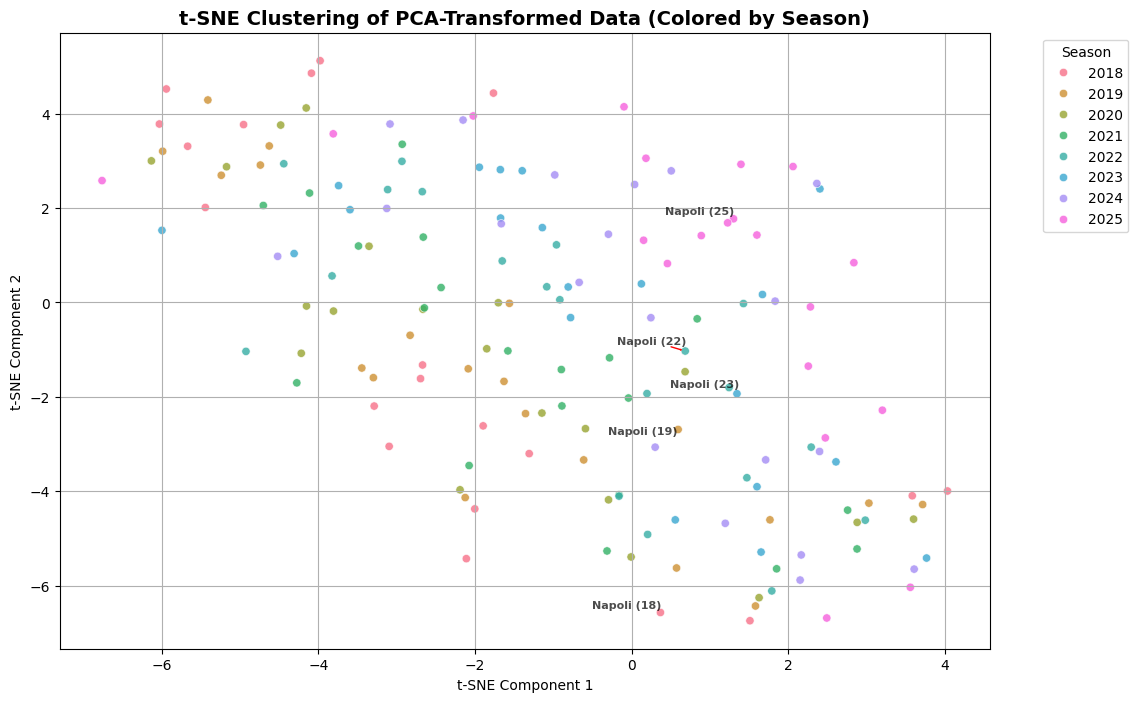

In [133]:
df_top4 = (df.iloc[:-98].sort_values(by=["season", "league", "points_per_match"], ascending=[True, True, False])
            .groupby(["season", "league"])
            .head(4))

teams_data = df_top4.drop(columns=["team", "season", "points_per_match", "league"], errors="ignore")
teams_data = teams_data.select_dtypes(include=[np.number])
teams_data = teams_data.loc[:, X.columns]
teams_data = teams_data.set_index(df_top4["team"])

scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

np.random.seed(42)
pca = PCA(n_components=0.95, random_state=43)
teams_pca_top4 = pca.fit_transform(teams_scaled)

pca_df = pd.DataFrame(teams_pca_top4, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca_top4.shape[1])])
pca_df["season"] = df_top4.set_index("team")["season"]

pca_features = pca_df.filter(like="PC")

tsne = TSNE(n_components=2, perplexity=50, random_state=43, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(pca_features)

tsne_df_top4 = pd.DataFrame(X_tsne, index=pca_df.index, columns=["t-SNE Component 1", "t-SNE Component 2"])
tsne_df_top4["season"] = pca_df["season"].astype(str)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=tsne_df_top4["t-SNE Component 1"], 
    y=tsne_df_top4["t-SNE Component 2"], 
    hue=tsne_df_top4["season"], 
    palette=sns.color_palette("husl", n_colors=len(tsne_df_top4["season"].unique())),
    alpha=0.8
)
texts = []
for team, season, (x, y) in zip(tsne_df_top4.index, tsne_df_top4["season"], zip(tsne_df_top4["t-SNE Component 1"], tsne_df_top4["t-SNE Component 2"])):
    season_label = str(season)[-2:]
    if team == "Napoli":
        texts.append(plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7, color='black', fontweight='bold'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of PCA-Transformed Data (Colored by Season)", fontsize=14, fontweight='bold')
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("../plots/napoli_tsne.png", bbox_inches='tight', dpi=600)
plt.show()

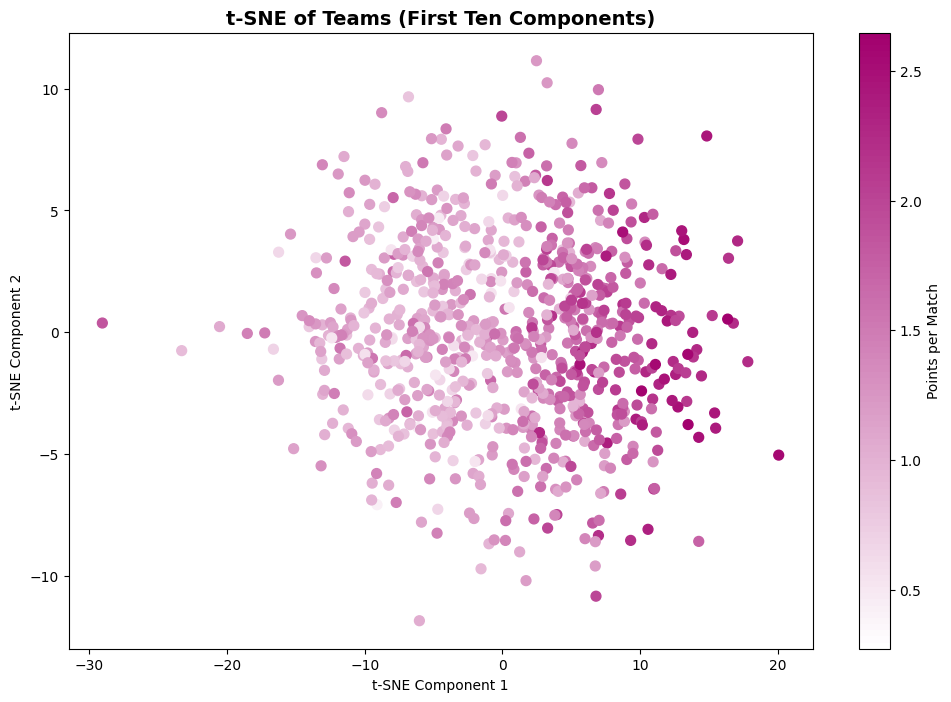

In [117]:
teams_data_all = df_filtered.drop(columns=["team", "season", "points_per_match", "league"], errors="ignore")
teams_data_all = teams_data_all.select_dtypes(include=[np.number])
teams_data_all = teams_data_all.set_index(df_filtered["team"])

teams_scaled_all = scaler.transform(teams_data_all)

tsne = TSNE(n_components=10, method='exact', random_state=43)
tsne_result = tsne.fit_transform(teams_scaled_all)

tsne_columns = [f"t-SNE{i+1}" for i in range(10)]
tsne_df = pd.DataFrame(tsne_result, index=teams_data_all.index, columns=tsne_columns)
tsne_df["points_per_match"] = df_filtered.set_index("team")["points_per_match"]
tsne_df["season"] = df_filtered.set_index("team")["season"]

# Create custom color map with the same colors as the revenue chart
colors = [mcolors.to_rgba("#ffffff"), mcolors.to_rgba("#a2006e")]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=100)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_df["t-SNE1"], tsne_df["t-SNE2"], c=tsne_df["points_per_match"], cmap=custom_cmap, s=50)
cbar = plt.colorbar(scatter, label='Points per Match')

plt.title('t-SNE of Teams (First Ten Components)', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.savefig("../plots/tsne_heatmap.png", bbox_inches='tight', dpi=600)
plt.show()

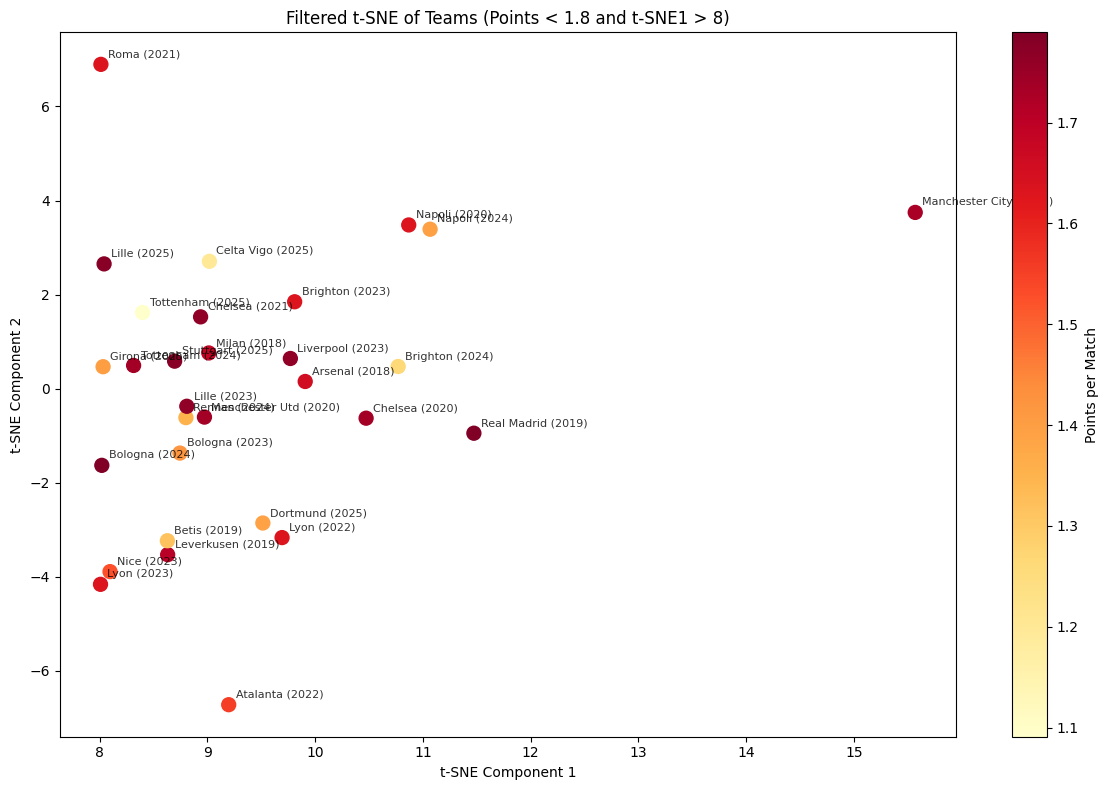

In [92]:
filtered_tsne = tsne_df[
    (tsne_df['points_per_match'] < 1.8) & 
    (tsne_df['t-SNE1'] > 8)
]

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    filtered_tsne["t-SNE1"], 
    filtered_tsne["t-SNE2"], 
    c=filtered_tsne["points_per_match"], 
    cmap='YlOrRd', 
    s=100
)

# Add labels for each point
for idx, row in filtered_tsne.iterrows():
    plt.annotate(
        f"{idx} ({int(row['season'])})", 
        (row['t-SNE1'], row['t-SNE2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        alpha=0.8
    )

plt.colorbar(scatter, label='Points per Match')
plt.title('Filtered t-SNE of Teams (Points < 1.8 and t-SNE1 > 8)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')


plt.tight_layout()
plt.show()

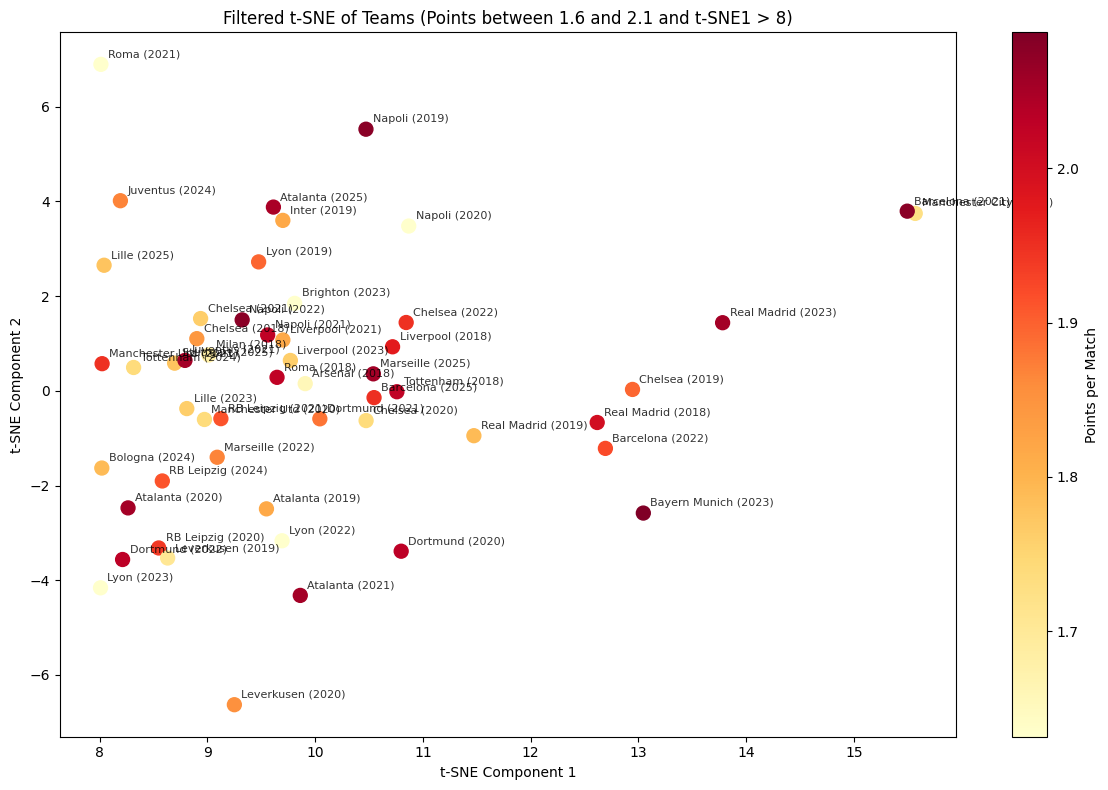

In [93]:
filtered_tsne = tsne_df[
    (tsne_df['points_per_match'] >= 1.6) & 
    (tsne_df['points_per_match'] <= 2.1) & 
    (tsne_df['t-SNE1'] > 8)
]

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    filtered_tsne["t-SNE1"], 
    filtered_tsne["t-SNE2"], 
    c=filtered_tsne["points_per_match"], 
    cmap='YlOrRd', 
    s=100
)

# Add labels for each point
for idx, row in filtered_tsne.iterrows():
    plt.annotate(
        f"{idx} ({int(row['season'])})", 
        (row['t-SNE1'], row['t-SNE2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        alpha=0.8
    )

plt.colorbar(scatter, label='Points per Match')
plt.title('Filtered t-SNE of Teams (Points between 1.6 and 2.1 and t-SNE1 > 8)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

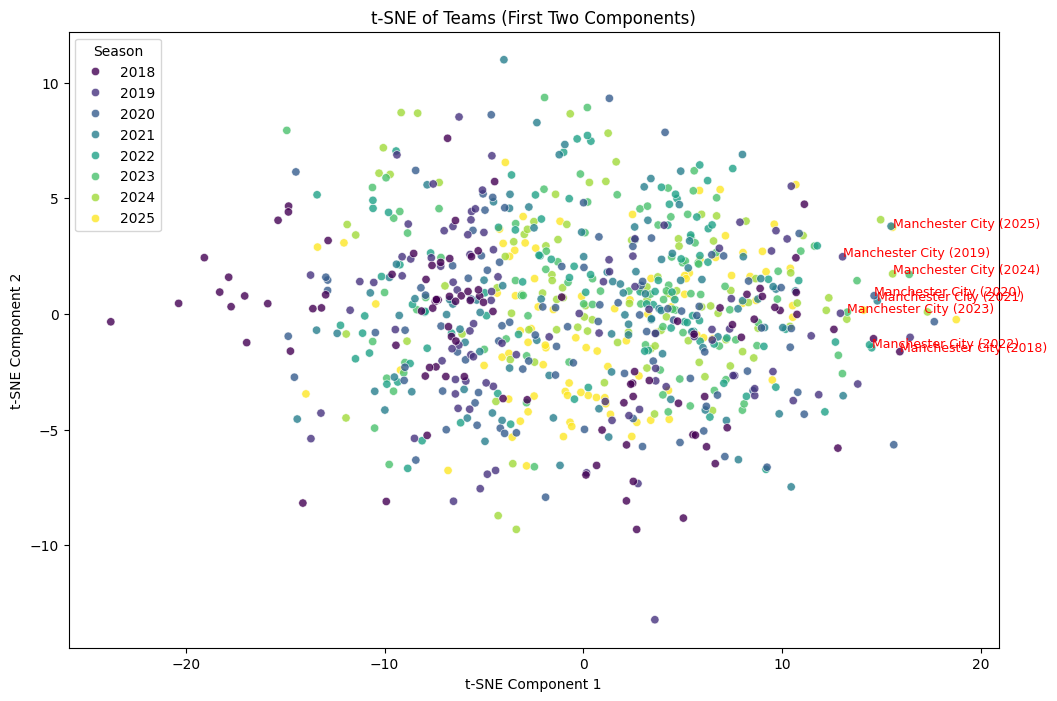

In [94]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="t-SNE1", y="t-SNE2", hue="season", data=tsne_df, palette="viridis", legend="full", alpha=0.8)

# Label Manchester City points with the season
for i in range(tsne_df.shape[0]):
    if "Manchester City" in tsne_df.index[i]:
        plt.text(tsne_df["t-SNE1"][i], tsne_df["t-SNE2"][i], f"{tsne_df.index[i]} ({tsne_df['season'][i]})", fontsize=9, color='red')

plt.title('t-SNE of Teams (First Two Components)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Season')
plt.show()

## 3d. Euclidean Distance Analysis

               Team  Avg_Euclidean_Distance
23          Arsenal                0.391868
7   Manchester City                0.681506
25         Valencia                0.749666
20          Sevilla                0.755466
4         Paris S-G                1.015090
27        Stuttgart                1.166888
16           Monaco                1.500340
1         Barcelona                1.756115
0     Bayern Munich                1.764426
17   Manchester Utd                1.815301
6         Liverpool                2.238847
11         Atalanta                2.590098
21            Milan                2.627432
19        Tottenham                2.648328
10       RB Leipzig                2.775887
3       Real Madrid                2.829151
2   Atlético Madrid                3.064197
9          Dortmund                3.074338
5             Inter                3.097823
8          Juventus                3.153411
14            Lille                3.320541
26           Rennes             

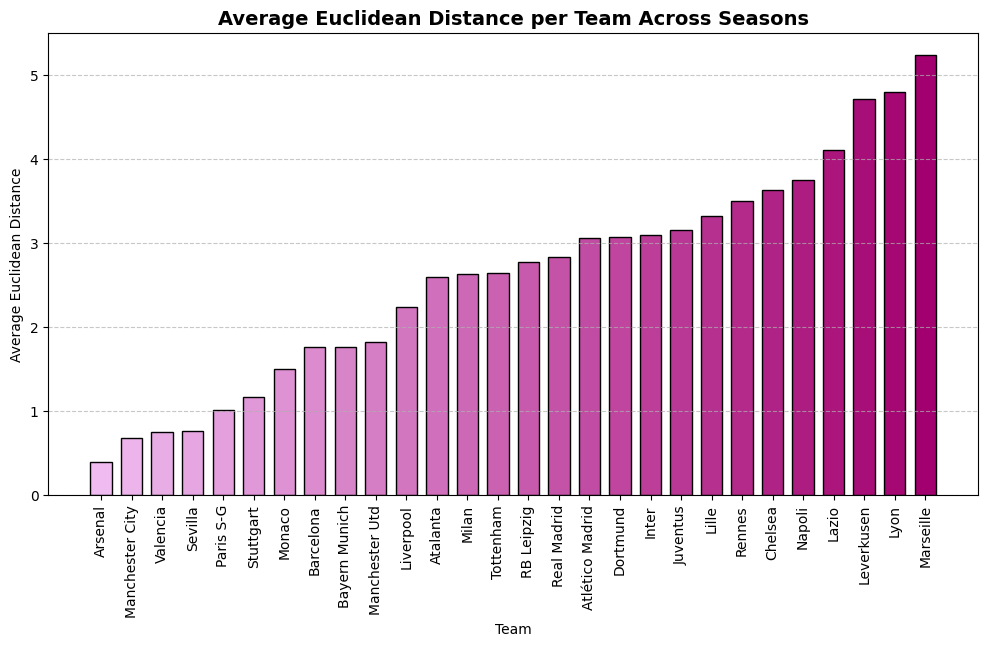

In [110]:
team_counts = tsne_df_top4.index.value_counts()
repeated_teams = team_counts[team_counts > 1].index 

team_distances = []

for team in repeated_teams:
    team_data = tsne_df_top4.loc[team, ["t-SNE Component 1", "t-SNE Component 2"]]  # Extract t-SNE components
    
    if team_data.shape[0] < 2:
        continue
    
    distances = pdist(team_data.values, metric="euclidean")
    
    avg_distance = np.mean(distances)
    team_distances.append({"Team": team, "Avg_Euclidean_Distance": avg_distance})

distance_df = pd.DataFrame(team_distances)

# Sort from least to greatest
distance_df = distance_df.sort_values(by="Avg_Euclidean_Distance")

print(distance_df)

# Define the gradient color range
colors = [mcolors.to_rgba("#efbbf0"), mcolors.to_rgba("#a2006e")]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(distance_df))
gradient_colors = [cmap(i / len(distance_df)) for i in range(len(distance_df))]

plt.figure(figsize=(12, 6))
plt.bar(distance_df["Team"], distance_df["Avg_Euclidean_Distance"], color=gradient_colors,  edgecolor='black', width=0.7)
plt.xlabel("Team")
plt.ylabel("Average Euclidean Distance")
plt.title("Average Euclidean Distance per Team Across Seasons", fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("../plots/per_team_euclidean_distance.png", bbox_inches='tight', dpi=600)
plt.show()


   Season_Gap  Avg_Euclidean_Distance
0           1                4.787337
1           2                4.878909
2           3                5.080966
3           4                5.438358
4           5                5.781511
5           6                6.128526
6           7                6.688756


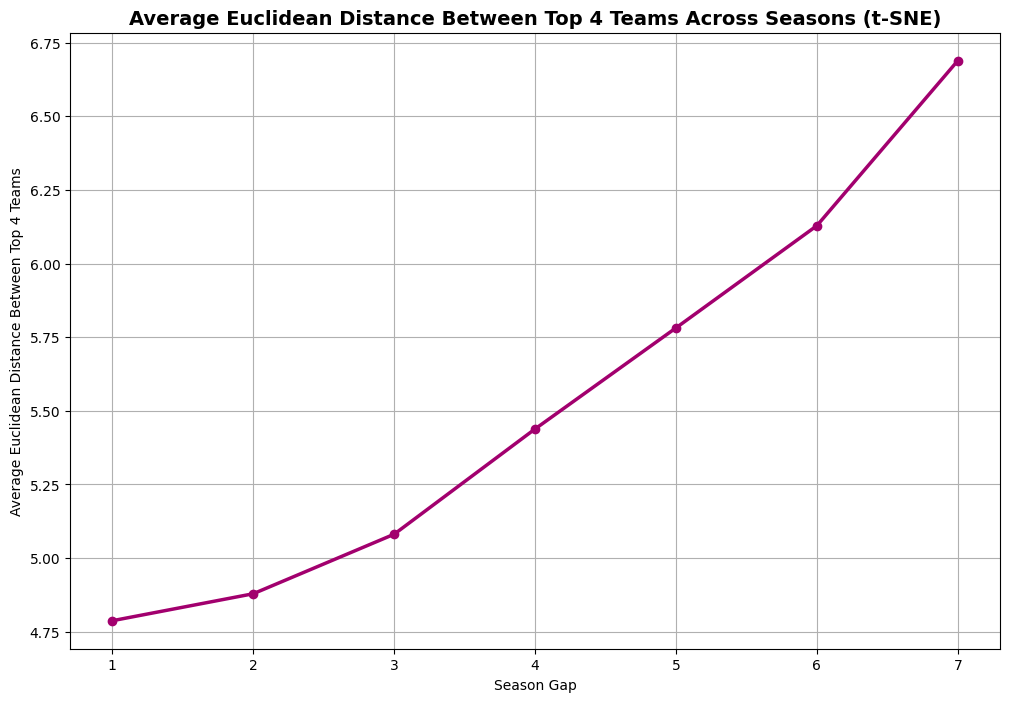

In [109]:
seasons = sorted(tsne_df_top4["season"].unique(), key=int)

season_gaps = range(1, len(seasons)) 
season_gap_distances = []

for gap in season_gaps:
    distances_for_gap = []

    for i in range(len(seasons) - gap):
        season_1 = seasons[i]
        season_2 = seasons[i + gap]


        season_1_data = tsne_df_top4[tsne_df_top4["season"] == season_1].filter(like="t-SNE")
        season_2_data = tsne_df_top4[tsne_df_top4["season"] == season_2].filter(like="t-SNE")

        if season_1_data.shape[0] > 0 and season_2_data.shape[0] > 0:
            distances = cdist(season_1_data.values, season_2_data.values, metric="euclidean")
            
            avg_distance = np.mean(distances)
            distances_for_gap.append(avg_distance)

    if distances_for_gap:
        season_gap_distances.append({"Season_Gap": gap, "Avg_Euclidean_Distance": np.mean(distances_for_gap)})


season_gap_distance_df = pd.DataFrame(season_gap_distances)

print(season_gap_distance_df)


plt.figure(figsize=(12, 8))
plt.plot(season_gap_distance_df["Season_Gap"], season_gap_distance_df["Avg_Euclidean_Distance"], marker='o', linestyle='-', color='#a2006e', linewidth=2.5)
plt.xlabel("Season Gap")
plt.ylabel("Average Euclidean Distance Between Top 4 Teams")
plt.title("Average Euclidean Distance Between Top 4 Teams Across Seasons (t-SNE)", fontsize=14, fontweight='bold')
plt.grid(True)
plt.xticks(season_gap_distance_df["Season_Gap"])
plt.savefig("../plots/overall_euclidean_distance.png", bbox_inches='tight', dpi=600)
plt.show()

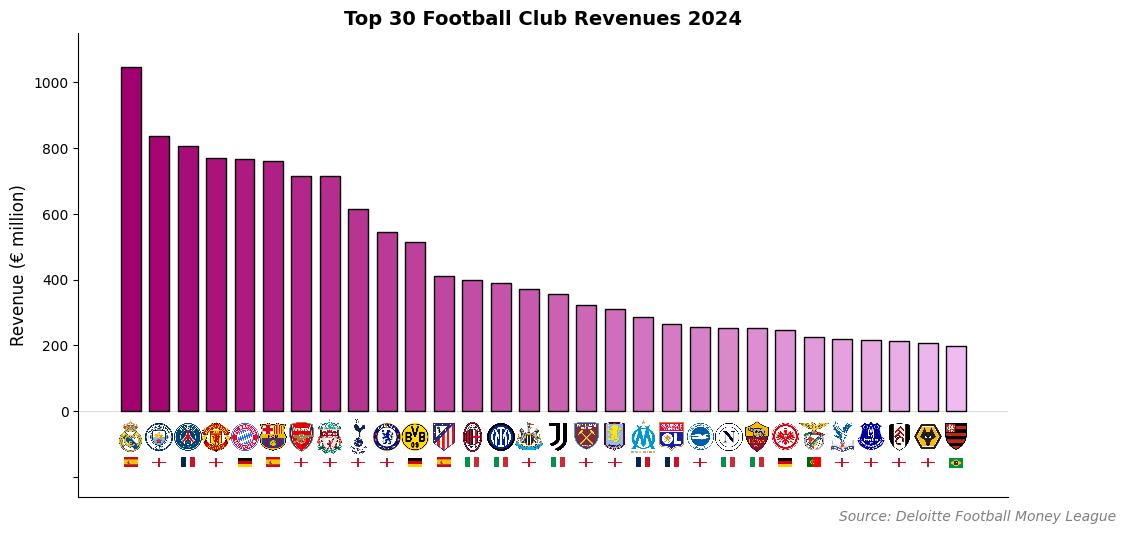

In [104]:
data = {
    "Real_Madrid_CF": 1045.5, "Manchester_City_FC": 837.8, "Paris_Saint-Germain_FC": 805.9, 
    "Manchester_United_FC": 770.6, "FC_Bayern_München": 765.4, "FC_Barcelona": 760.3, 
    "Arsenal_FC": 716.5, "Liverpool_FC": 714.7, "Tottenham_Hotspur": 615, "Chelsea_FC": 545.5,
    "Borussia_Dortmund": 513.7, "Atletico_Madrid": 409.5, "AC_Milan": 397.6, 
    "FC_Internazionale_Milano": 391, "Newcastle_United": 371.8, "Juventus_FC": 355.7, 
    "West_Ham_United_FC": 322.2, "Aston_Villa_FC": 310.2, "Olympique_Marseille": 287, "Olympique_Lyonnais": 264.1,
    "Brighton_and_Hove_Albion_FC": 256.8, "SSC_Napoli": 253.6, "AS_Roma": 253.2, "Eintracht_Frankfurt": 245.2,
    "SL_Benfica": 224, "Crystal_Palace_FC": 218.9, "Everton_FC": 217.6, "Fulham_FC": 212.2, 
    "Wolverhampton_Wanderers_FC": 206.9, "Flamengo": 198.2
}

countries = {
    "Real_Madrid_CF": "Spain", "Manchester_City_FC": "England", "Paris_Saint-Germain_FC": "France", 
    "Manchester_United_FC": "England", "FC_Bayern_München": "Germany", "FC_Barcelona": "Spain", 
    "Arsenal_FC": "England", "Liverpool_FC": "England", "Tottenham_Hotspur": "England", "Chelsea_FC": "England",
    "Borussia_Dortmund": "Germany", "Atletico_Madrid": "Spain", "AC_Milan": "Italy", 
    "FC_Internazionale_Milano": "Italy", "Newcastle_United": "England", "Juventus_FC": "Italy", 
    "West_Ham_United_FC": "England", "Aston_Villa_FC": "England", "Olympique_Marseille": "France", "Olympique_Lyonnais": "France",
    "Brighton_and_Hove_Albion_FC": "England", "SSC_Napoli": "Italy", "AS_Roma": "Italy", "Eintracht_Frankfurt": "Germany",
    "SL_Benfica": "Portugal", "Crystal_Palace_FC": "England", "Everton_FC": "England", "Fulham_FC": "England", 
    "Wolverhampton_Wanderers_FC": "England", "Flamengo": "Brazil"
}

# Sort data in descending order
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
teams = list(sorted_data.keys())
values = list(sorted_data.values())

# Define the gradient color range
colors = [mcolors.to_rgba("#a2006e"), mcolors.to_rgba("#efbbf0")]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(teams))
gradient_colors = [cmap(i / len(teams)) for i in range(len(teams))]

# Create the figure and axis with extra bottom space
fig, ax = plt.subplots(figsize=(12, 8))

# Create bars
bars = ax.bar(range(len(teams)), values, color=gradient_colors, edgecolor='black', width=0.7)

# Set y-limit to include space for badges and flags
minimum_y = 0
ax.set_ylim(minimum_y - max(values) * 0.25, max(values) * 1.1)

# Add badges and flags under each bar
badge_size = 0.1
flag_size = 0.08
for i, team in enumerate(teams):
    png_path = f'../assets/badges/{team}.png'
    flag_path = f'../assets/flags/{countries[team]}.png'
    if os.path.exists(png_path):
        img = imread(png_path)
        
        # Create an OffsetImage with the badge
        imagebox = OffsetImage(img, zoom=badge_size)
        imagebox.image.axes = ax
        
        # Position badge at the bottom of the plot area
        badge_y_pos = minimum_y - max(values) * 0.075  # Position in the middle of the extra space
        ab = AnnotationBbox(imagebox, (i, badge_y_pos), frameon=False, box_alignment=(0.5, 0.5))
        ax.add_artist(ab)
        
    if os.path.exists(flag_path):
        flag_img = imread(flag_path)
        
        # Create an OffsetImage with the flag
        flag_imagebox = OffsetImage(flag_img, zoom=flag_size)
        flag_imagebox.image.axes = ax
        
        # Position flag below the badge
        flag_y_pos = badge_y_pos - max(values) * 0.075  # Position below the badge
        flag_ab = AnnotationBbox(flag_imagebox, (i, flag_y_pos), frameon=False, box_alignment=(0.5, 0.5))
        ax.add_artist(flag_ab)

# Styling
ax.set_ylabel("Revenue (€ million)", fontsize=12)
ax.set_title("Top 30 Football Club Revenues 2024", fontsize=14, fontweight='bold')

# Add more space at the bottom for the badges and flags
plt.subplots_adjust(bottom=0.3)

# Remove the bottom numbers and right/top spines
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Draw a subtle horizontal line at y=0
ax.axhline(y=0, color='black', linestyle='-', alpha=0.2, linewidth=0.5)

# Hide negative y-axis tick labels
yticks = ax.get_yticks()
yticklabels = [str(int(y)) if y >= 0 else '' for y in yticks]
ax.set_yticklabels(yticklabels)

source_text = "Source: Deloitte Football Money League"
plt.figtext(0.99, 0.27, source_text, horizontalalignment='right', fontsize=10, color='gray', style='italic')

plt.savefig("../plots/revenue.png", bbox_inches='tight', dpi=600)
plt.show()